In [1]:
#Importaciones basicas
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
# graficos incrustados
%matplotlib inline

#Carga de los CSV
BBVA_data = pd.read_csv('train_clientes.csv', header=0)
print("Data Train: ", BBVA_data.shape)

Data Train:  (70000, 53)


In [2]:
def completar_data(BBVA):
    if BBVA.isnull().any().any():
        tipos = BBVA.columns.to_series().groupby(BBVA.dtypes).groups
        ctext = tipos[np.dtype('object')]
        columnas = BBVA.columns  # lista de todas las columnas
        cnum = list(set(columnas) - set(ctext))
        #COmpletando los valores nulos de colummnas numericas con la media
        for c in cnum:
            mean = BBVA[c].mean()
            BBVA[c] = BBVA[c].fillna(mean)
        # Completando valores nulos de columnas categóricas con la moda
        for c in ctext:
            mode = BBVA[c].mode()[0]
            BBVA[c] = BBVA[c].fillna(mode)
        print("Clean Data Test: ", BBVA.shape, BBVA.isnull().any().any())

completar_data(BBVA_data)

Clean Data Test:  (70000, 53) False


In [3]:
def factorizacion_data(datus):
    #Pasando los datos de edad a rango de 10 años
    EDAD2 = pd.cut(datus['EDAD'], range(0, 150, 10))
    datus['EDAD'] = EDAD2
    
    #Factorizando la columna EDAD
    datus['EDAD'], _ = pd.factorize(datus['EDAD'])
    
    #Factorizar las demas columnas de datos categoricos
    tipos = datus.columns.to_series().groupby(datus.dtypes).groups
    ctext = tipos[np.dtype('object')]
    for c in ctext:
        datus[c], _ = pd.factorize(datus[c])
    print(type(datus), datus.shape)
    return datus

BBVA_data = factorizacion_data(BBVA_data)

<class 'pandas.core.frame.DataFrame'> (70000, 53)


In [4]:
X_train = BBVA_data.drop(['ID_CORRELATIVO', 'ATTRITION'], axis=1)
print(type(X_train), X_train.shape)
# Separamos las columnas objetivo
columna_artitrion = BBVA_data['ATTRITION']
columna_id = BBVA_data['ID_CORRELATIVO']

<class 'pandas.core.frame.DataFrame'> (70000, 51)


In [5]:
header = list(X_train.head(n=0).to_dict().keys())
print(header)

['CODMES', 'FLG_BANCARIZADO', 'RANG_INGRESO', 'FLAG_LIMA_PROVINCIA', 'EDAD', 'ANTIGUEDAD', 'RANG_SDO_PASIVO_MENOS0', 'SDO_ACTIVO_MENOS0', 'SDO_ACTIVO_MENOS1', 'SDO_ACTIVO_MENOS2', 'SDO_ACTIVO_MENOS3', 'SDO_ACTIVO_MENOS4', 'SDO_ACTIVO_MENOS5', 'FLG_SEGURO_MENOS0', 'FLG_SEGURO_MENOS1', 'FLG_SEGURO_MENOS2', 'FLG_SEGURO_MENOS3', 'FLG_SEGURO_MENOS4', 'FLG_SEGURO_MENOS5', 'RANG_NRO_PRODUCTOS_MENOS0', 'FLG_NOMINA', 'NRO_ACCES_CANAL1_MENOS0', 'NRO_ACCES_CANAL1_MENOS1', 'NRO_ACCES_CANAL1_MENOS2', 'NRO_ACCES_CANAL1_MENOS3', 'NRO_ACCES_CANAL1_MENOS4', 'NRO_ACCES_CANAL1_MENOS5', 'NRO_ACCES_CANAL2_MENOS0', 'NRO_ACCES_CANAL2_MENOS1', 'NRO_ACCES_CANAL2_MENOS2', 'NRO_ACCES_CANAL2_MENOS3', 'NRO_ACCES_CANAL2_MENOS4', 'NRO_ACCES_CANAL2_MENOS5', 'NRO_ACCES_CANAL3_MENOS0', 'NRO_ACCES_CANAL3_MENOS1', 'NRO_ACCES_CANAL3_MENOS2', 'NRO_ACCES_CANAL3_MENOS3', 'NRO_ACCES_CANAL3_MENOS4', 'NRO_ACCES_CANAL3_MENOS5', 'NRO_ENTID_SSFF_MENOS0', 'NRO_ENTID_SSFF_MENOS1', 'NRO_ENTID_SSFF_MENOS2', 'NRO_ENTID_SSFF_MENOS3', 'N

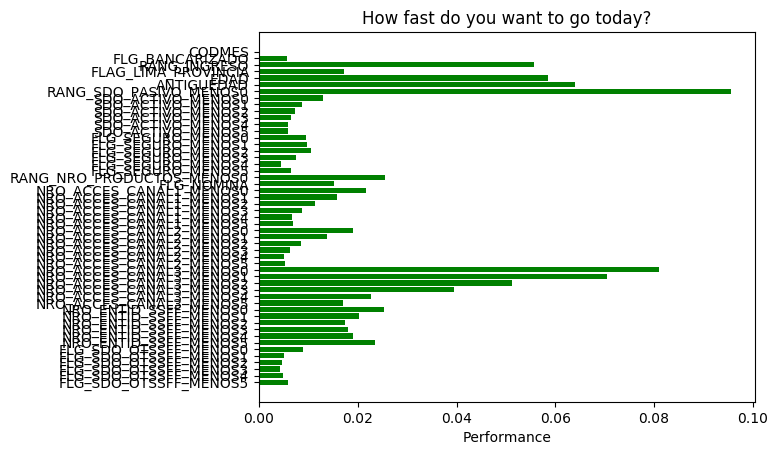

In [24]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
caract = X_train.shape[1]

from sklearn.ensemble import ExtraTreesClassifier
arbol = ExtraTreesClassifier(n_estimators=25, random_state=0)
arbol.fit(X_train, columna_artitrion)

ax.barh(range(caract), arbol.feature_importances_, align='center', color='green', ecolor='black')
ax.set_yticks(range(caract))
ax.set_yticklabels(header)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

Feature ranking:
1. feature 6 (0.095702) RANG_SDO_PASIVO_MENOS0
2. feature 33 (0.081086) NRO_ACCES_CANAL3_MENOS0
3. feature 34 (0.070400) NRO_ACCES_CANAL3_MENOS1
4. feature 5 (0.063920) ANTIGUEDAD
5. feature 4 (0.058522) EDAD
6. feature 2 (0.055737) RANG_INGRESO
7. feature 35 (0.051144) NRO_ACCES_CANAL3_MENOS2
8. feature 36 (0.039441) NRO_ACCES_CANAL3_MENOS3
9. feature 19 (0.025512) RANG_NRO_PRODUCTOS_MENOS0
10. feature 39 (0.025338) NRO_ENTID_SSFF_MENOS0
11. feature 44 (0.023493) NRO_ENTID_SSFF_MENOS5
12. feature 37 (0.022610) NRO_ACCES_CANAL3_MENOS4
13. feature 21 (0.021586) NRO_ACCES_CANAL1_MENOS0
14. feature 40 (0.020309) NRO_ENTID_SSFF_MENOS1
15. feature 43 (0.019108) NRO_ENTID_SSFF_MENOS4
16. feature 27 (0.019017) NRO_ACCES_CANAL2_MENOS0
17. feature 42 (0.017963) NRO_ENTID_SSFF_MENOS3
18. feature 41 (0.017321) NRO_ENTID_SSFF_MENOS2
19. feature 3 (0.017183) FLAG_LIMA_PROVINCIA
20. feature 38 (0.016972) NRO_ACCES_CANAL3_MENOS5
21. feature 22 (0.015691) NRO_ACCES_CANAL1_MENOS1
22. f

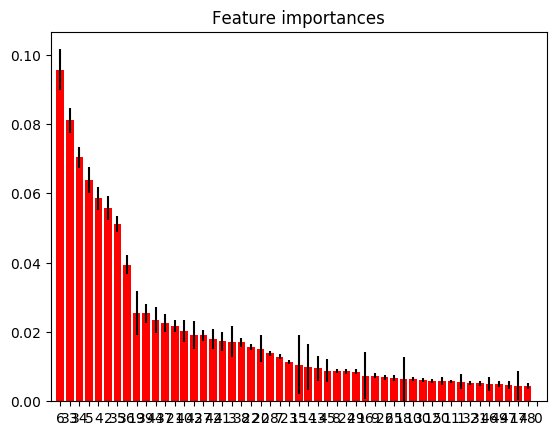

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
X = X_train
forest = ExtraTreesClassifier(n_estimators=25, random_state=0)
forest.fit(X_train, columna_artitrion)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]), header[indices[f]])

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [26]:
print(type(columna_artitrion), columna_artitrion.shape)

<class 'pandas.core.series.Series'> (70000,)


In [27]:
print(type(X_train), X_train.shape)

<class 'pandas.core.frame.DataFrame'> (70000, 51)


In [35]:
print(type(X_train), X_train.shape)

<class 'pandas.core.frame.DataFrame'> (70000, 51)


In [29]:
y = columna_artitrion
print(type(y), y.shape)

<class 'pandas.core.series.Series'> (70000,)


In [33]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler(copy=True, with_mean=True, with_std=True)
X = sc_X.fit_transform(X_train.astype(float))
print(type(X), X.shape)

<class 'numpy.ndarray'> (70000, 51)


Automatically created module for IPython interactive environment


/home/villacorta/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/home/villacorta/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:12: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


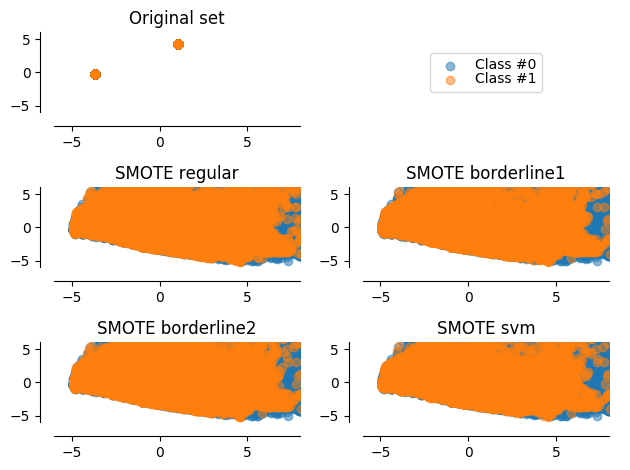

In [36]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE

print(__doc__)


def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1


# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply regular SMOTE
kind = ['regular', 'borderline1', 'borderline2', 'svm']
sm = [SMOTE(kind=k) for k in kind]
X_resampled = []
y_resampled = []
X_res_vis = []
for method in sm:
    X_res, y_res = method.fit_sample(X, y)
    X_resampled.append(X_res)
    y_resampled.append(y_res)
    X_res_vis.append(pca.transform(X_res))

# Two subplots, unpack the axes array immediately
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
# Remove axis for second plot
ax2.axis('off')
ax_res = [ax3, ax4, ax5, ax6]

c0, c1 = plot_resampling(ax1, X_vis, y, 'Original set')
for i in range(len(kind)):
    plot_resampling(ax_res[i], X_res_vis[i], y_resampled[i],
                    'SMOTE {}'.format(kind[i]))

ax2.legend((c0, c1), ('Class #0', 'Class #1'), loc='center',
           ncol=1, labelspacing=0.)
plt.tight_layout()
plt.show()

In [37]:
X.shape

(70000, 51)

In [39]:
y.shape

(70000,)

Feature ranking:
1. feature 6 (0.095131) RANG_SDO_PASIVO_MENOS0
2. feature 33 (0.081284) NRO_ACCES_CANAL3_MENOS0
3. feature 34 (0.070632) NRO_ACCES_CANAL3_MENOS1
4. feature 5 (0.065375) ANTIGUEDAD
5. feature 4 (0.058379) EDAD
6. feature 2 (0.056438) RANG_INGRESO
7. feature 35 (0.050779) NRO_ACCES_CANAL3_MENOS2
8. feature 36 (0.039273) NRO_ACCES_CANAL3_MENOS3
9. feature 39 (0.025711) NRO_ENTID_SSFF_MENOS0
10. feature 19 (0.025063) RANG_NRO_PRODUCTOS_MENOS0
11. feature 44 (0.023112) NRO_ENTID_SSFF_MENOS5
12. feature 37 (0.022226) NRO_ACCES_CANAL3_MENOS4
13. feature 21 (0.021675) NRO_ACCES_CANAL1_MENOS0
14. feature 40 (0.020258) NRO_ENTID_SSFF_MENOS1
15. feature 43 (0.018864) NRO_ENTID_SSFF_MENOS4
16. feature 27 (0.018622) NRO_ACCES_CANAL2_MENOS0
17. feature 41 (0.018321) NRO_ENTID_SSFF_MENOS2
18. feature 42 (0.017765) NRO_ENTID_SSFF_MENOS3
19. feature 38 (0.016979) NRO_ACCES_CANAL3_MENOS5
20. feature 22 (0.015921) NRO_ACCES_CANAL1_MENOS1
21. feature 3 (0.015521) FLAG_LIMA_PROVINCIA
22. f

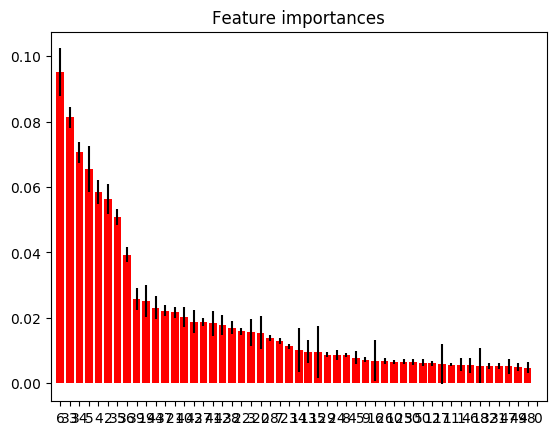

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]), header[indices[f]])

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [41]:
columnas = list(X_train.columns.values)
columnas

['CODMES',
 'FLG_BANCARIZADO',
 'RANG_INGRESO',
 'FLAG_LIMA_PROVINCIA',
 'EDAD',
 'ANTIGUEDAD',
 'RANG_SDO_PASIVO_MENOS0',
 'SDO_ACTIVO_MENOS0',
 'SDO_ACTIVO_MENOS1',
 'SDO_ACTIVO_MENOS2',
 'SDO_ACTIVO_MENOS3',
 'SDO_ACTIVO_MENOS4',
 'SDO_ACTIVO_MENOS5',
 'FLG_SEGURO_MENOS0',
 'FLG_SEGURO_MENOS1',
 'FLG_SEGURO_MENOS2',
 'FLG_SEGURO_MENOS3',
 'FLG_SEGURO_MENOS4',
 'FLG_SEGURO_MENOS5',
 'RANG_NRO_PRODUCTOS_MENOS0',
 'FLG_NOMINA',
 'NRO_ACCES_CANAL1_MENOS0',
 'NRO_ACCES_CANAL1_MENOS1',
 'NRO_ACCES_CANAL1_MENOS2',
 'NRO_ACCES_CANAL1_MENOS3',
 'NRO_ACCES_CANAL1_MENOS4',
 'NRO_ACCES_CANAL1_MENOS5',
 'NRO_ACCES_CANAL2_MENOS0',
 'NRO_ACCES_CANAL2_MENOS1',
 'NRO_ACCES_CANAL2_MENOS2',
 'NRO_ACCES_CANAL2_MENOS3',
 'NRO_ACCES_CANAL2_MENOS4',
 'NRO_ACCES_CANAL2_MENOS5',
 'NRO_ACCES_CANAL3_MENOS0',
 'NRO_ACCES_CANAL3_MENOS1',
 'NRO_ACCES_CANAL3_MENOS2',
 'NRO_ACCES_CANAL3_MENOS3',
 'NRO_ACCES_CANAL3_MENOS4',
 'NRO_ACCES_CANAL3_MENOS5',
 'NRO_ENTID_SSFF_MENOS0',
 'NRO_ENTID_SSFF_MENOS1',
 'NRO_ENTID_

In [45]:
from sklearn.feature_selection import RFE
era = RFE(forest, 25).fit(X, y)  # número de atributos a seleccionar
# imprimir resultados   LA CORRECION SE PASO A LA SGTE CELDA

TypeError: 'atrib' is an invalid keyword argument for this function

In [48]:
mas_relevantes = [columnas[i] for i in list(era.support_.nonzero()[0])]
mas_relevantes 

['RANG_INGRESO',
 'EDAD',
 'ANTIGUEDAD',
 'RANG_SDO_PASIVO_MENOS0',
 'SDO_ACTIVO_MENOS0',
 'SDO_ACTIVO_MENOS1',
 'FLG_SEGURO_MENOS2',
 'RANG_NRO_PRODUCTOS_MENOS0',
 'NRO_ACCES_CANAL1_MENOS0',
 'NRO_ACCES_CANAL1_MENOS1',
 'NRO_ACCES_CANAL2_MENOS0',
 'NRO_ACCES_CANAL2_MENOS1',
 'NRO_ACCES_CANAL3_MENOS0',
 'NRO_ACCES_CANAL3_MENOS1',
 'NRO_ACCES_CANAL3_MENOS2',
 'NRO_ACCES_CANAL3_MENOS3',
 'NRO_ACCES_CANAL3_MENOS4',
 'NRO_ACCES_CANAL3_MENOS5',
 'NRO_ENTID_SSFF_MENOS0',
 'NRO_ENTID_SSFF_MENOS1',
 'NRO_ENTID_SSFF_MENOS2',
 'NRO_ENTID_SSFF_MENOS3',
 'NRO_ENTID_SSFF_MENOS4',
 'NRO_ENTID_SSFF_MENOS5',
 'FLG_SDO_OTSSFF_MENOS0']

In [49]:
importantes = ['RANG_SDO_PASIVO_MENOS0','NRO_ACCES_CANAL3_MENOS0', 'NRO_ACCES_CANAL3_MENOS1', 'ANTIGUEDAD', 'EDAD', 'RANG_INGRESO', 'NRO_ACCES_CANAL3_MENOS2', 'NRO_ACCES_CANAL3_MENOS3', 'NRO_ENTID_SSFF_MENOS0', 'RANG_NRO_PRODUCTOS_MENOS0' ,'NRO_ENTID_SSFF_MENOS5', 'NRO_ACCES_CANAL3_MENOS4', 'NRO_ACCES_CANAL1_MENOS0', 'NRO_ENTID_SSFF_MENOS1', 'NRO_ENTID_SSFF_MENOS4', 'NRO_ACCES_CANAL2_MENOS0', 'NRO_ENTID_SSFF_MENOS2', 'NRO_ENTID_SSFF_MENOS3', 'NRO_ACCES_CANAL3_MENOS5', 'NRO_ACCES_CANAL1_MENOS1', 'FLAG_LIMA_PROVINCIA', 'FLG_NOMINA', 'NRO_ACCES_CANAL2_MENOS1', 'SDO_ACTIVO_MENOS0','NRO_ACCES_CANAL1_MENOS2']
importantes

['RANG_SDO_PASIVO_MENOS0',
 'NRO_ACCES_CANAL3_MENOS0',
 'NRO_ACCES_CANAL3_MENOS1',
 'ANTIGUEDAD',
 'EDAD',
 'RANG_INGRESO',
 'NRO_ACCES_CANAL3_MENOS2',
 'NRO_ACCES_CANAL3_MENOS3',
 'NRO_ENTID_SSFF_MENOS0',
 'RANG_NRO_PRODUCTOS_MENOS0',
 'NRO_ENTID_SSFF_MENOS5',
 'NRO_ACCES_CANAL3_MENOS4',
 'NRO_ACCES_CANAL1_MENOS0',
 'NRO_ENTID_SSFF_MENOS1',
 'NRO_ENTID_SSFF_MENOS4',
 'NRO_ACCES_CANAL2_MENOS0',
 'NRO_ENTID_SSFF_MENOS2',
 'NRO_ENTID_SSFF_MENOS3',
 'NRO_ACCES_CANAL3_MENOS5',
 'NRO_ACCES_CANAL1_MENOS1',
 'FLAG_LIMA_PROVINCIA',
 'FLG_NOMINA',
 'NRO_ACCES_CANAL2_MENOS1',
 'SDO_ACTIVO_MENOS0',
 'NRO_ACCES_CANAL1_MENOS2']

In [50]:
importantes == mas_relevantes

False

In [51]:
for datus in mas_relevantes:
    if datus in importantes:
        print("OK -> ", datus)
    else:
        print("///// ", datus)

OK ->  RANG_INGRESO
OK ->  EDAD
OK ->  ANTIGUEDAD
OK ->  RANG_SDO_PASIVO_MENOS0
OK ->  SDO_ACTIVO_MENOS0
/////  SDO_ACTIVO_MENOS1
/////  FLG_SEGURO_MENOS2
OK ->  RANG_NRO_PRODUCTOS_MENOS0
OK ->  NRO_ACCES_CANAL1_MENOS0
OK ->  NRO_ACCES_CANAL1_MENOS1
OK ->  NRO_ACCES_CANAL2_MENOS0
OK ->  NRO_ACCES_CANAL2_MENOS1
OK ->  NRO_ACCES_CANAL3_MENOS0
OK ->  NRO_ACCES_CANAL3_MENOS1
OK ->  NRO_ACCES_CANAL3_MENOS2
OK ->  NRO_ACCES_CANAL3_MENOS3
OK ->  NRO_ACCES_CANAL3_MENOS4
OK ->  NRO_ACCES_CANAL3_MENOS5
OK ->  NRO_ENTID_SSFF_MENOS0
OK ->  NRO_ENTID_SSFF_MENOS1
OK ->  NRO_ENTID_SSFF_MENOS2
OK ->  NRO_ENTID_SSFF_MENOS3
OK ->  NRO_ENTID_SSFF_MENOS4
OK ->  NRO_ENTID_SSFF_MENOS5
/////  FLG_SDO_OTSSFF_MENOS0


In [55]:
var_quedan = [_ for _ in mas_relevantes if _ in importantes]
var_quedan.__len__()
var_quedan

['RANG_INGRESO',
 'EDAD',
 'ANTIGUEDAD',
 'RANG_SDO_PASIVO_MENOS0',
 'SDO_ACTIVO_MENOS0',
 'RANG_NRO_PRODUCTOS_MENOS0',
 'NRO_ACCES_CANAL1_MENOS0',
 'NRO_ACCES_CANAL1_MENOS1',
 'NRO_ACCES_CANAL2_MENOS0',
 'NRO_ACCES_CANAL2_MENOS1',
 'NRO_ACCES_CANAL3_MENOS0',
 'NRO_ACCES_CANAL3_MENOS1',
 'NRO_ACCES_CANAL3_MENOS2',
 'NRO_ACCES_CANAL3_MENOS3',
 'NRO_ACCES_CANAL3_MENOS4',
 'NRO_ACCES_CANAL3_MENOS5',
 'NRO_ENTID_SSFF_MENOS0',
 'NRO_ENTID_SSFF_MENOS1',
 'NRO_ENTID_SSFF_MENOS2',
 'NRO_ENTID_SSFF_MENOS3',
 'NRO_ENTID_SSFF_MENOS4',
 'NRO_ENTID_SSFF_MENOS5']